# Mas dimensiones: regresion multilinear
Pensemos en el problema de la casa donde ademas del area tenemos el numero de cuartos. Mas parametros significa mas dimensiones.

Veamos algunos datos (ver figura abajo)

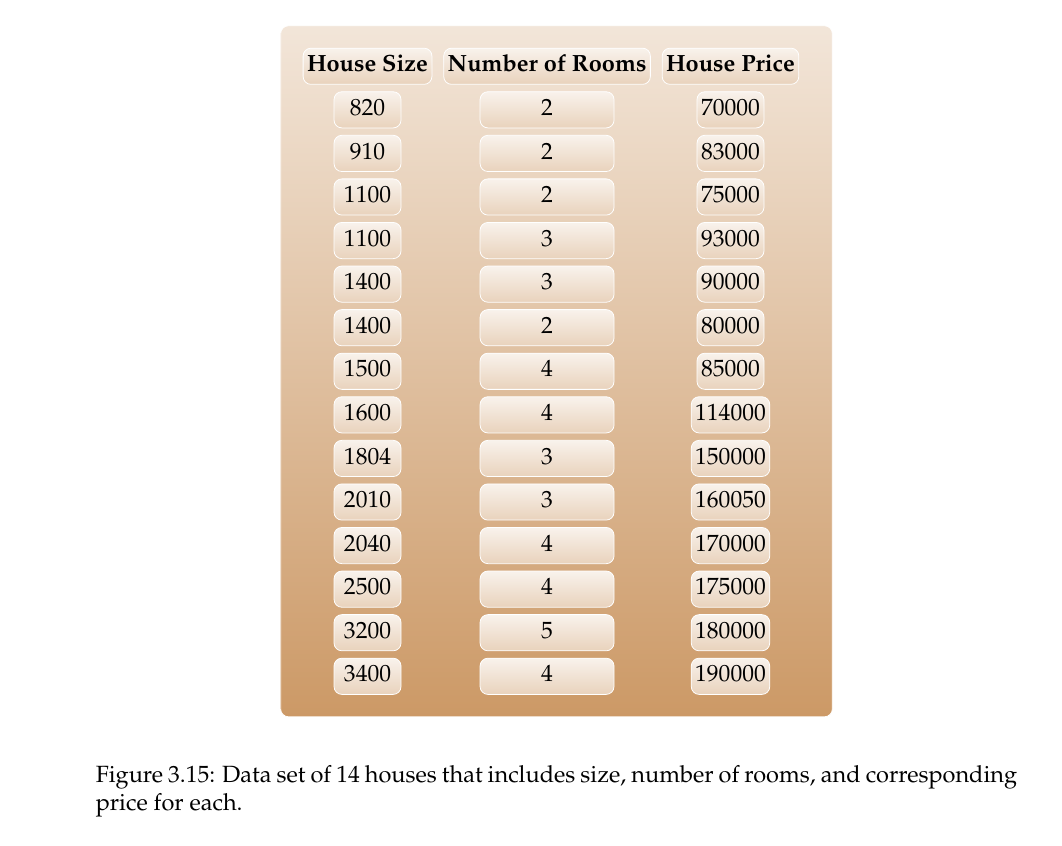

El modelo matematico es:


$$h(\theta_0, \theta_1, \theta_2)=\theta_0 + \theta_1 x_1 + \theta_2 x_2 .$$

Como se crea el sistema (se genera la matriz)

$$h(\theta_0, \theta_1, \theta_2)=\theta_0 +  820 \theta_1 + 2 \theta_2  .$$

$$h(\theta_0, \theta_1, \theta_2)=\theta_0 +  910 \theta_1 + 2 \theta_2  .$$

$$h(\theta_0, \theta_1, \theta_2)=\theta_0 +  1100 \theta_1 + 2 \theta_2  .$$

La ultima

$$h(\theta_0, \theta_1, \theta_2)=\theta_0 +  3400 \theta_1 + 4 \theta_2  .$$
Escribiendo eso en forma matricial

$$X \theta = y $$
donde

$$ X=
\begin{pmatrix}
1 & 820 & 2  \\
1 & 920 & 2  \\
1 & 110 & 2  \\
\vdots & \vdots & \vdots \\
1 & 3400 & 4  \\
\end{pmatrix}
$$

$$ \theta = \begin{pmatrix} \theta_0 \\ \theta_1 \\ \theta_2  \end{pmatrix} $$
y

$$y = \begin{pmatrix} 70000 \\ 83000 \\ 75000 \\ \vdots \\ 190000  \end{pmatrix} .$$

Este problema se puede resolver de varias formas.
Veamos

1. Piense en minimos cuadrados

$$\frac12 \| h(\theta) - y \|^2 = \frac12 \| X \theta - y \|^2 $$
Esto nos conduce a las ecuaciones normales


$$X^T X \theta = X^T y .$$
Si la inversa de $X^T X$ existe entonces  la solucion es
$$\theta = (X^T X)^{-1} X^T y .$$
En este caso $X^T X$ tiene inversa. Garantizado por que las columnas de $X$ son linealmente independientes.

2. Que pasa si $X$ no es invertible?  
Tenemos que regularizar (Tikhonov). Usando la matriz $L=\sqrt{\lambda} I$,

$$\theta = ( X^T X + \lambda I)^{-1} X^T y .$$
$\lambda > 0$ (pequenho).

3. Se puede sersolver el problema usando el metodo del gradiente.
Se define la funcion de costo

$$ J(\theta) = \frac12 \| h(\theta) - y \|^2 + \lambda \| x \|^2.$$
Se resolver con SD, GC, SCG, GD ($\theta^{(i+1)}=\theta^{(i)}-\alpha \nabla J(\theta^{(i)})$). $\alpha$ puede encontrarse de "mil" maneras.

4. Si puede hallar la pseudoinversa $X^+$, la solucion es
$$ \theta^+ = X^+ y $$
Lo bonito de esto es que la teoria que desarrollamos antes es igual.  Una columna mas mas en la matriz $X$ pero de resto todo es igual.

Lenguaje: Las columnas de la table en la Fig 3.15, se llaman
**features** (caracteristicas)

## Feature normalizacion (normalizacion de caracteristicas).
Observe de nuevo la Fig 3.15. La primera columna es el area en de la casa en pies y la segunda es el numero de cuartos.
Hay una escala de cerca de 3 digitos (1 a 1000) en estas dos columnas (estan "disparatados"). Esto no es bueno, si pudieramos
"normalizar" de forma que todas columnas tuvieran dimensiones equiparables, el problema gana en los siguientes puntos.

1. Como estan las cosas la columna uno es casi 1000 veces la columna 2. Si postulamos el problema de minimos cuadrados, las curvas de nivel son ellipses muyyyyyyyyyyyyyyyyyyy achatadas.
El normalizar ayuda a acerlerar el proceso de convergencia.

2. El normalizar estabiliza el problema reduciendo el numero de condicion (condition number) $\kappa$. Disminuye el error.  

3. Elimina un sesgo.

**Pregunta clave**. Profe, si usted normaliza $X$, usted esta cambiando el problema y estamos resolviendo otro plobema y no el que queremos.

**Explicacion:**

El problema original es
$$X \theta = y \tag{1} $$

Digamos que al normalizar la matriz normalizada es $X_n$
el nuevo problema es

$$X_n \theta_n = y \tag{2} $$
los datos $y$ son los mismos.

Resolvemos el problema (2). Encontramos (entrenamos) $\theta_n$.
Que hacemos con esto?

Los datos nuevos son: area de la casa y numero de cuartos de mi casa en Aranjuez. Llamelos $x$, normalice los datos
$x_{n}$, calcule la hipotesis

$$h(\theta_n) = [ x_{n}]^T \theta_n $$
Ojo la normalizacion a $x_n$ es identica a la que hizo para econtrar $X_n$.

## Tecnicas de normalizacion (feature normalizacion)
La normalizacion se hace por columnas de la matriz de datos $X$.
Cada columna es un "feature"

1. **Estandarizacion** (standarization): En este tecnica se resta la media y se divide por la desviacion estandar.
Es decir, si $X_j$ es la columna $j$ de $X$

$$X_j := \frac{X_j - \mu_j}{\sigma_j} $$

donde

$$\mu_j = \frac{1}{m} \sum_{i=1}^m x_{ij} $$
donde $x_{ij}$ es la componente $i$ del vector $X_j$.
y

(indces "dummy" (de la suma, repeditos en la notacion de Einstein)
$$\sigma = \sqrt{\frac{\sum_{i=1}^m ( x_{ij} - \mu_j)^2}{m}}$$

A esto tambien lo llaman **z-score normalization**.

2. **Mean normalization** (normalizacion por la media)


$$X_j := \frac{X_j - \mu_j}{\max_i \{x_{ij}\} - \min_i \{ x_{ij}\}}   \quad , \quad i = 1 , 2, \cdots, m \quad, \quad j=1,2, \cdots , n$$


3. **Min-Max Scaling**:
La formula es

$$X_j :=  \frac{X_j - \min_i \{ x_{ij} \}}{
   \max_i \{x_{ij}\} - \min_i \{ x_{ij}\}
} .$$

Esta formula tiene la ventaja de que todo queda entre $[0,1]$
Cuando es 0? Cuando es 1?

4. **Vector normalization**: La formula es

$$X_j := \frac{X_j}{\| X_j \| } $$




Los parametros pueden ser muchos. La tabla que mostramos abajo es de una base de datos "Boston housing data set" y usa
(14 features)

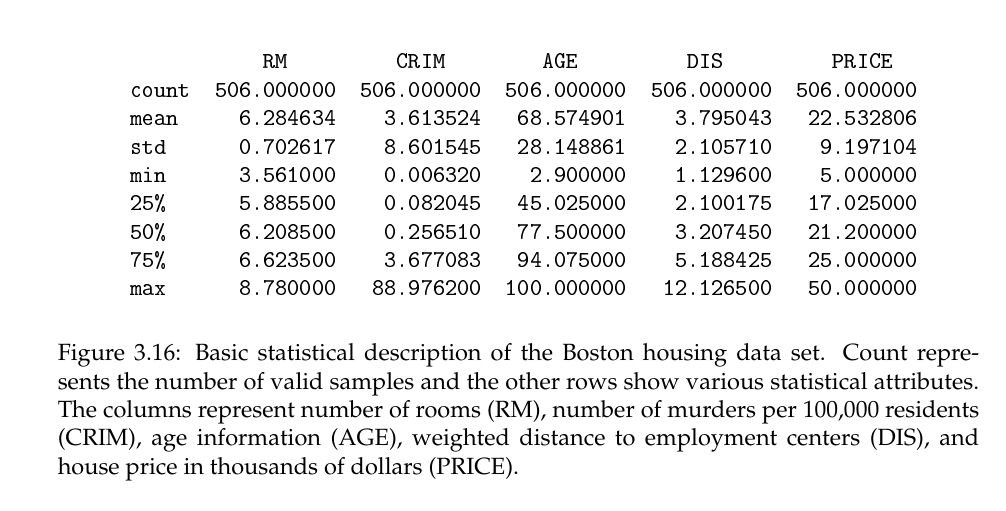

Graficas acerca de estudio de estos datos

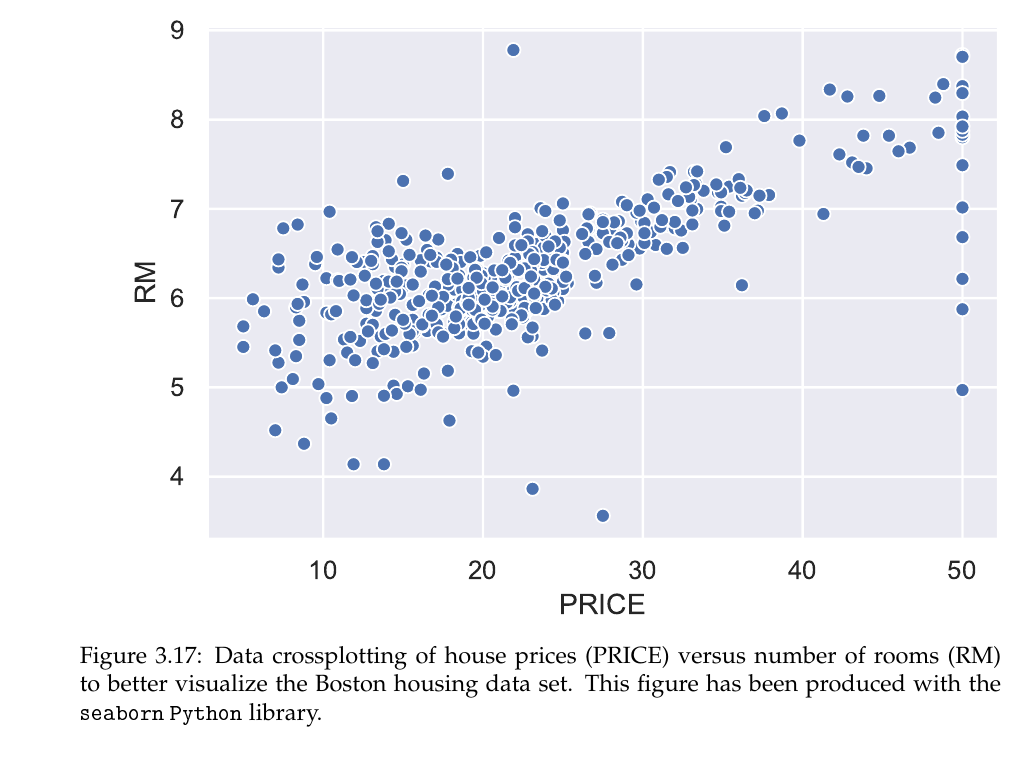

La siguiente grafica muestra la (cross-plots) entre los parametros de la tabla de arriba. En la diagonal se muestran los histogramas. Generada con `scikit-learn`

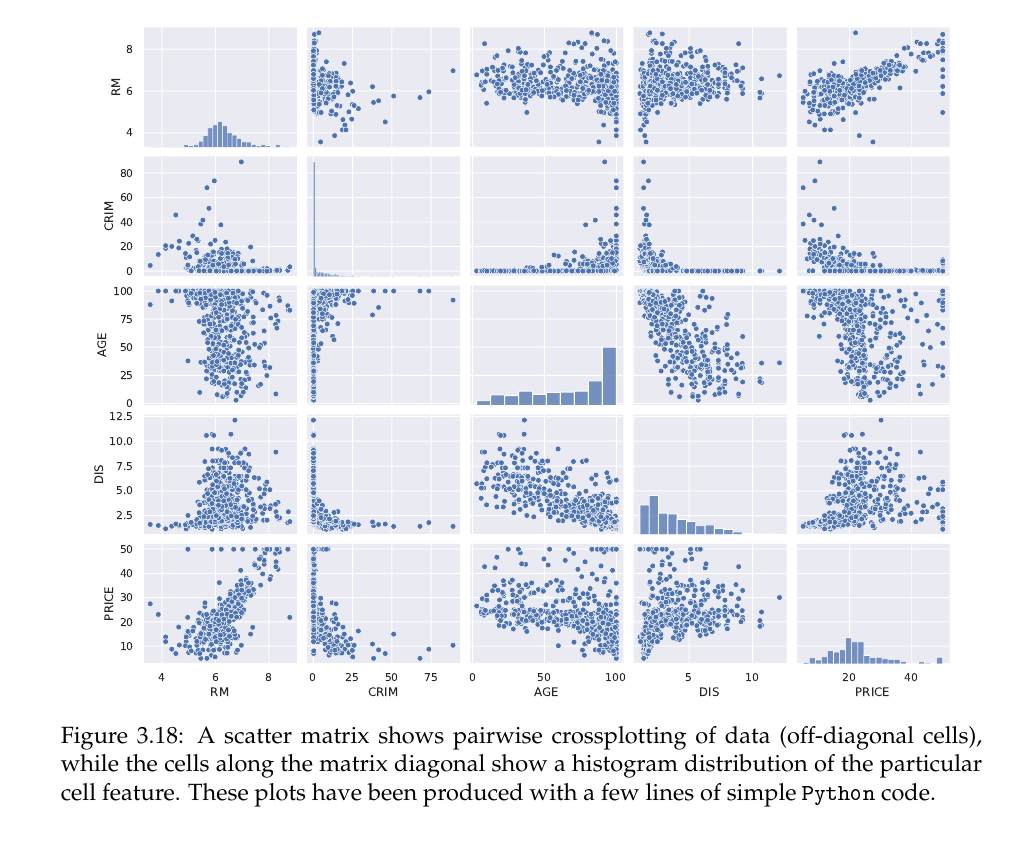

Las graficas siguientes muestran algunos de los beneficiones de la normalizacion.

1. El histograma de las distancias a centros de trabajo (Boston Housing Data) antes y despues de normalizar.

2. Datos despues de PCA (Principal Component Analysis)
con y sin normalizacion.

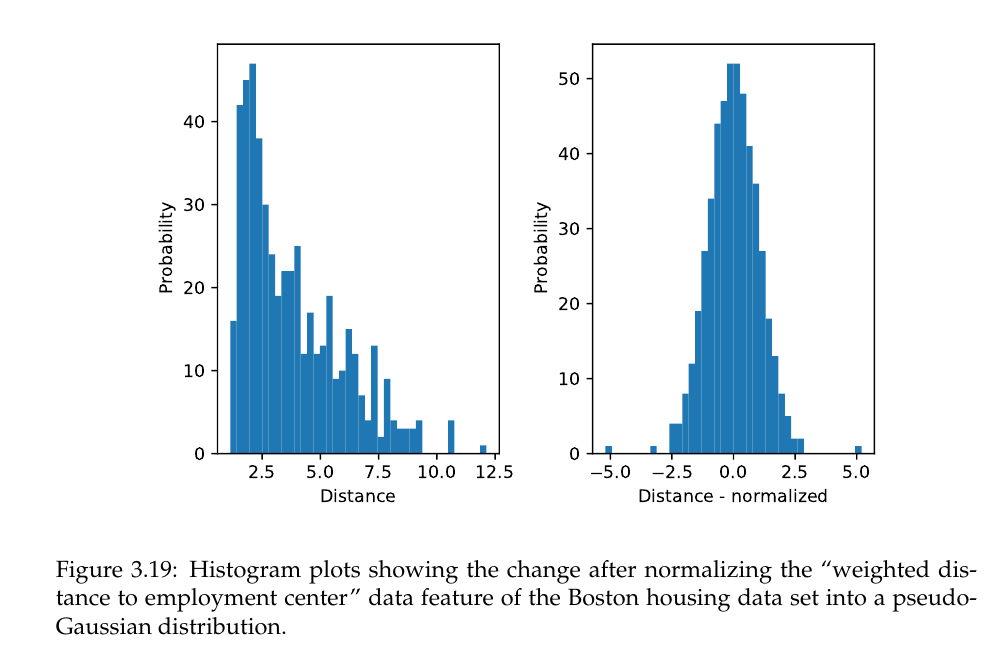

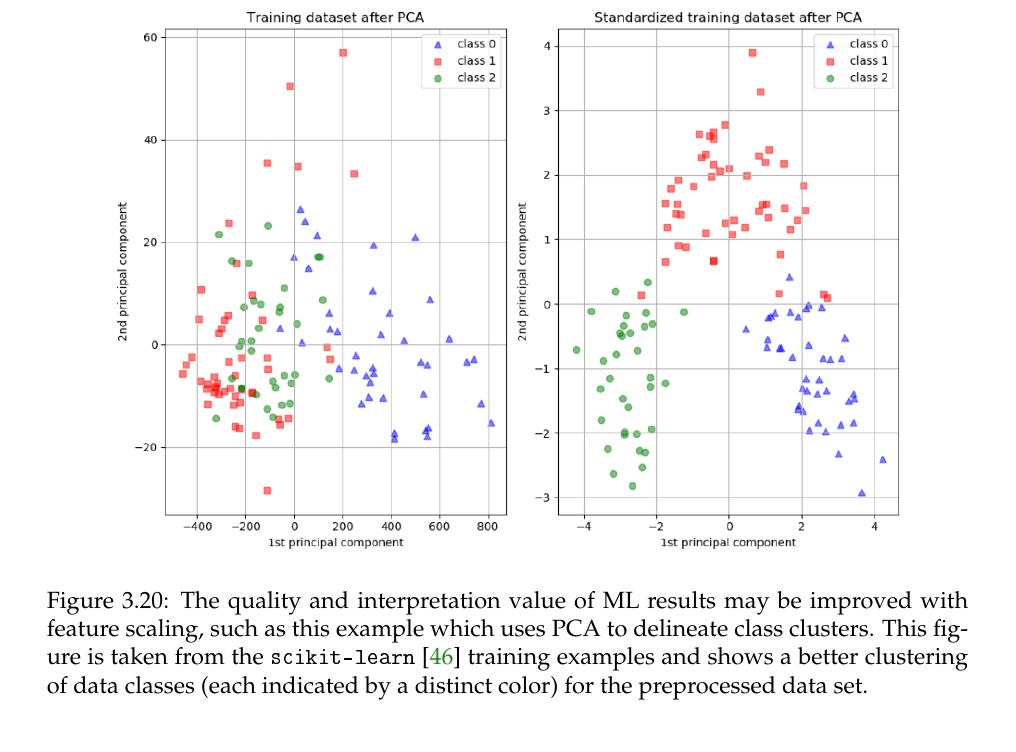

4. La normalizacion puede llevar a una mejor interpretacion de los datos.

# Regresion polinomial.
La regresion polinomial tambien es lineal (aunque un polinomio de grado mayor que 1 no es lineal) esto lo explico "ya".

La hipotesis es la siguiente

$$h(\theta, x)  = \theta_0 + \theta_1 x + \theta_2 x^2 + \cdots + \theta_n x^n .$$

Construyamos la matriz del problema

$$h(\theta, x_1)  = \theta_0 + \theta_1 x_1 + \theta_2 x_1^2 + \cdots + \theta_n x_1^n .$$

$$h(\theta, x_2)  = \theta_0 + \theta_1 x_2 + \theta_2 x_2^2 + \cdots + \theta_n x_2^n .$$

$$ \vdots $$

$$h(\theta, x_2)  = \theta_0 + \theta_1 x_m + \theta_2 x_m^2 + \cdots + \theta_n x_2^n .$$

Escribimos esto como una matrix por un vector.

El sistema es


\begin{eqnarray}
\begin{pmatrix}
1 & x_1 & x_1^2 & \cdots & \cdots & \cdots & x_1^n \\
1 & x_2 & x_2^2 & \cdots & \cdots & \cdots & x_2^n \\
\vdots & \vdots & \vdots & \vdots &  \vdots & \vdots & \vdots \\
\vdots & \vdots & \vdots & \vdots &  \vdots & \vdots & \vdots \\
1 & x_m & x_m^2 & \cdots & \cdots & \cdots & x_m^n \\
\end{pmatrix}
\begin{pmatrix}
\theta_0 \\ \theta_1 \\ \vdots \\ \vdots \\ \theta_n
\end{pmatrix}
=
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ \vdots \\ y_m
\end{pmatrix}
\end{eqnarray}
Es el mismo problema

$$ X \theta = y$$

La matriz $X$ se llama $V$ de
[Vandermone](https://en.wikipedia.org/wiki/Vandermonde_matrix)

Si $m=n$ estamos hablando de **interpolacion de Lagrange**.
En este caso los conceptos de **regresion** e **interpolacion** coinciden.
Pero si $m \ne n$ son muy distintos.

* En interpolacion la curva tiene que pasar por **todos los puntos**
* En regresion la curva puede no tocar ningun punto.

Cuano $m=n$, el problema tiene la solucion

$$\theta = V^{-1} y. $$

# Proxima clase regresion polinomial en varias variables.